<a href="https://colab.research.google.com/github/AtmuriApoorva/Apoorva/blob/main/FINMEE_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [77]:
path = '/content/machine_logs.csv'
df=pd.read_csv(path)

In [78]:
df.head(5)

,timestamp,machine_id,sensor_temp_c,vibration_mm_s,status_code
0,2025-01-01 00:00:00,MILL_CRUSHER_01,64.168495,10.652147,Running
1,2025-01-01 00:05:00,MILL_CRUSHER_01,59.834133,9.566729,Running
2,2025-01-01 00:10:00,MILL_CRUSHER_01,59.281779,10.375491,Running
3,2025-01-01 00:15:00,MILL_CRUSHER_01,62.957002,10.769664,Running
4,2025-01-01 00:20:00,MILL_CRUSHER_01,61.440107,9.927583,Running


In [79]:
print('Data Info', df.info())
print('\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       100000 non-null  object 
 1   machine_id      100000 non-null  object 
 2   sensor_temp_c   95025 non-null   float64
 3   vibration_mm_s  100000 non-null  float64
 4   status_code     100000 non-null  object 
dtypes: float64(2), object(3)
memory usage: 3.8+ MB
Data Info None

        sensor_temp_c  vibration_mm_s
count   95025.000000   100000.000000
mean       72.493246        9.800146
std         7.492766        3.802790
min        53.670580        0.000000
25%        66.240106        6.342047
50%        72.510900        9.844165
75%        78.739860       13.430006
max        91.880099       16.969134


In [80]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['machine_id'] = df['machine_id'].astype('category')
df['status_code'] = df['status_code'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   timestamp       100000 non-null  datetime64[ns]
 1   machine_id      100000 non-null  category      
 2   sensor_temp_c   95025 non-null   float64       
 3   vibration_mm_s  100000 non-null  float64       
 4   status_code     100000 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 2.5 MB


In [81]:
print(df.isnull().sum())
mean_sensor = df['sensor_temp_c'].mean()
print(mean_sensor)

df['sensor_temp_c'].fillna(value=mean_sensor, inplace=True)
df.isnull().sum()

timestamp            0
machine_id           0
sensor_temp_c     4975
vibration_mm_s       0
status_code          0
dtype: int64
72.49324643935346


/tmp/ipython-input-4282622712.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sensor_temp_c'].fillna(value=mean_sensor, inplace=True)


,0
timestamp,0
machine_id,0
sensor_temp_c,0
vibration_mm_s,0
status_code,0


<function matplotlib.pyplot.show(close=None, block=None)>

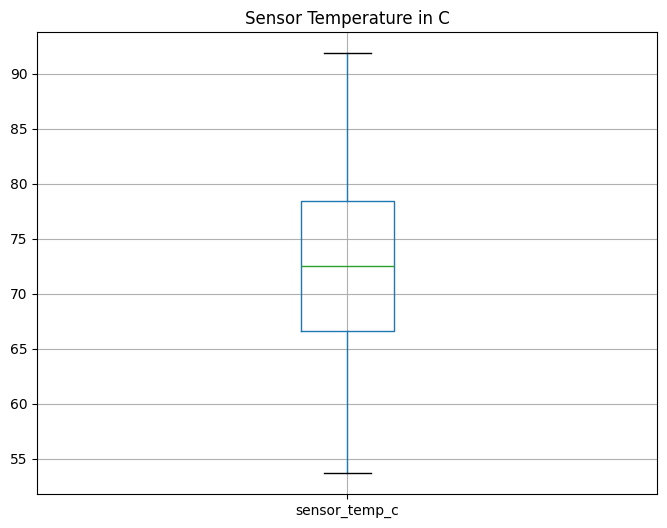

In [82]:
plt.figure(figsize=(8,6))
df.boxplot(column=['sensor_temp_c'])
plt.title('Sensor Temperature in C')
plt.show

In [83]:
mean_vibrations = df['vibration_mm_s'].mean()
print(mean_vibrations)

9.80014636052213


<function matplotlib.pyplot.show(close=None, block=None)>

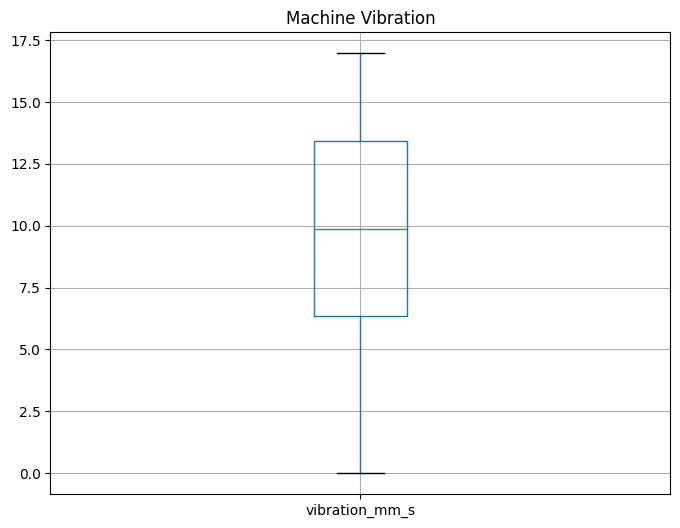

In [84]:
plt.figure(figsize=(8,6))
df.boxplot(column=['vibration_mm_s'])
plt.title('Machine Vibration')
plt.show

In [86]:
scaler = StandardScaler()
df['sensor_temp_c'] = scaler.fit_transform(df[['sensor_temp_c']])
df['vibration_mm_s'] = scaler.fit_transform(df[['vibration_mm_s']])

<function matplotlib.pyplot.show(close=None, block=None)>

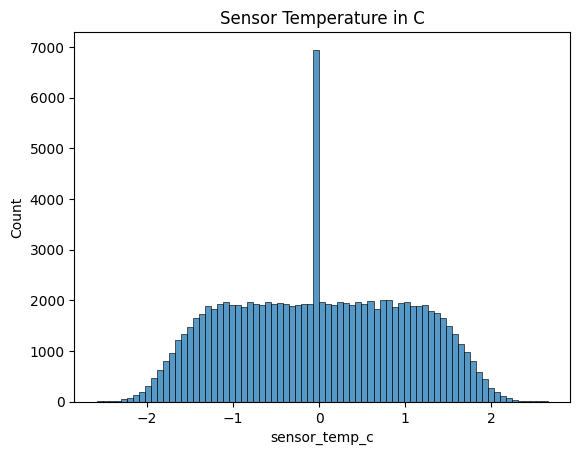

In [66]:
sns.histplot(df['sensor_temp_c'])
plt.title('Sensor Temperature in C')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

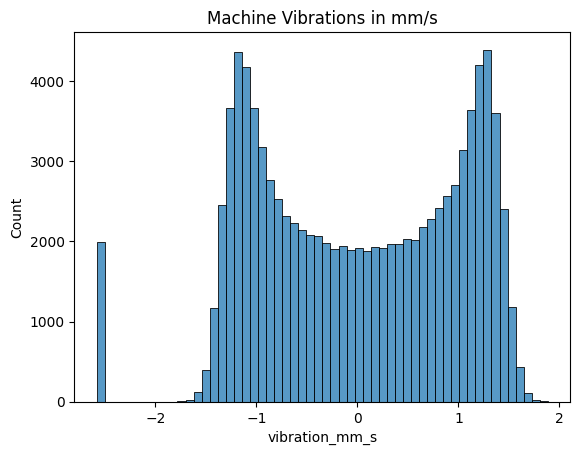

In [67]:
sns.histplot(df['vibration_mm_s'])
plt.title('Machine Vibrations in mm/s')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

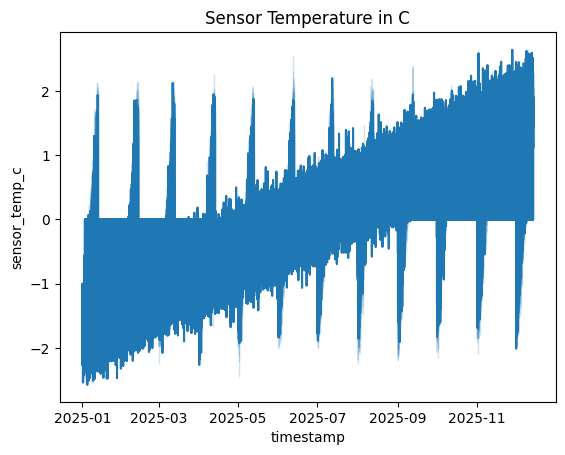

In [87]:
sns.lineplot(x='timestamp', y='sensor_temp_c', data=df)
plt.title('Sensor Temperature in C')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

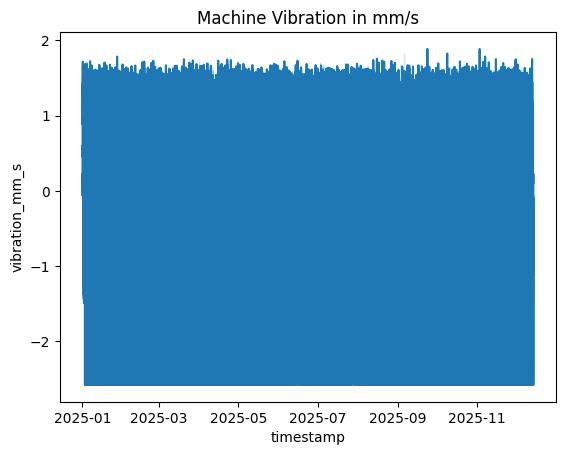

In [88]:
sns.lineplot(x='timestamp', y='vibration_mm_s', data=df)
plt.title('Machine Vibration in mm/s')
plt.show

Summary of Data Quality Issues:
During the data preparation phase, several data quality issues were identified.
1. Missing data values
The sensor_temp_c column was found to have 4975 missing entries.
These missing values were imputed using the mean of the column. The calculated mean was 72.49 C.
Mean imputation was chosen over dropping of values because sensor temperature is a numerical feature with continuous distribution. Imputing with mean preserves the tendency of the feature and avoids the loss of valuable data by dropping row.
2. Incorrect Data Types
The timestamp column was initially an object type, which is not suitable for time series analysis. It was converted to datatime64.
By converting the timestamp to datetime, it allows for chronologicl sorting, time based feature extraction and visualisation of trends over time.

The sensor_temp_c and vibration_mm_s column show stable trends and approximatesly normal distributions, centred around 0 after scaling. This indcates stable and predictable behaviour of the machine.